In [39]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [40]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [189]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [190]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [191]:
# Set features. This will also be used as your x values.
selected_features = df[[
    'koi_fpflag_nt',
    'koi_fpflag_ss',
    'koi_fpflag_co',
    'koi_fpflag_ec',
    'koi_period',
    'koi_time0bk',
    'koi_impact',
    'koi_duration',
    'koi_depth',
    'koi_prad',
    'koi_teq',
    'koi_insol',
    'koi_model_snr',
    'koi_tce_plnt_num',
    'koi_steff',
    'koi_slogg',
    'koi_srad',
    'ra',
    'dec',
    'koi_kepmag'
]]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


In [192]:
X = selected_features
y = df["koi_disposition"]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify =y)

In [217]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
6080,1,0,0,0,12.496435,132.035800,1.1700,84.32000,271.7,55.34,1397,899.44,141.5,1,6821,3.805,2.730,289.23080,44.412483,13.054
3001,0,0,0,0,11.615625,131.968430,0.9770,2.23300,191.2,2.84,905,158.69,8.8,2,5332,4.083,1.453,293.52756,41.111439,15.162
570,0,1,0,0,10.980246,137.137607,0.7330,3.74464,50078.0,21.94,821,107.47,1555.4,1,5952,4.462,0.897,282.79764,43.578129,14.212
4897,1,0,0,0,466.908240,136.373100,0.0868,2.64000,660.0,2.19,210,0.46,5.4,1,5340,4.456,0.867,297.65436,43.178551,15.202
625,0,1,1,1,1.061933,133.850441,0.7130,2.14290,133.6,2.29,2508,9391.15,80.2,1,6134,3.975,1.851,288.90253,44.632992,12.953


In [218]:
from collections import Counter
Counter(y_train)

Counter({'FALSE POSITIVE': 2628, 'CANDIDATE': 1265, 'CONFIRMED': 1350})

It looks fairly balanced

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [219]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X_train_scaled = MinMaxScaler().fit(X_train)
X_test_scaled = X_train_scaled.transform(X_test)
X_train_scaled = X_train_scaled.transform(X_train)

# Train the SVM Model



In [220]:
# Create the SVC Model
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear')
# svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
from sklearn import set_config
set_config(display="diagram")
pipe = make_pipeline(svm_model)
pipe

Pipeline(steps=[('svc', SVC(kernel='linear'))])

In [222]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8081251192065612
Testing Data Score: 0.8117848970251716


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

SVM MODEL with GridSearchCV

In [223]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV
param_grid = {
                "C": [0.1,1,10,50,100],
                "gamma" : [0.0001, 0.001, 0.01, 0.1]
            }
svm_grid_model = GridSearchCV(svm_model, param_grid)

In [224]:
# Train the model with GridSearch
svm_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [225]:
print(svm_grid_model.best_params_)
print(svm_grid_model.best_score_)

{'C': 100, 'gamma': 0.0001}
0.8115615380696992


In [226]:
print(f"Training Data Score: {svm_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_grid_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8165172611100515
Testing Data Score: 0.8232265446224256


# Train the Decision Tree Model

In [227]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
acc=clf.score(X_test, y_test)

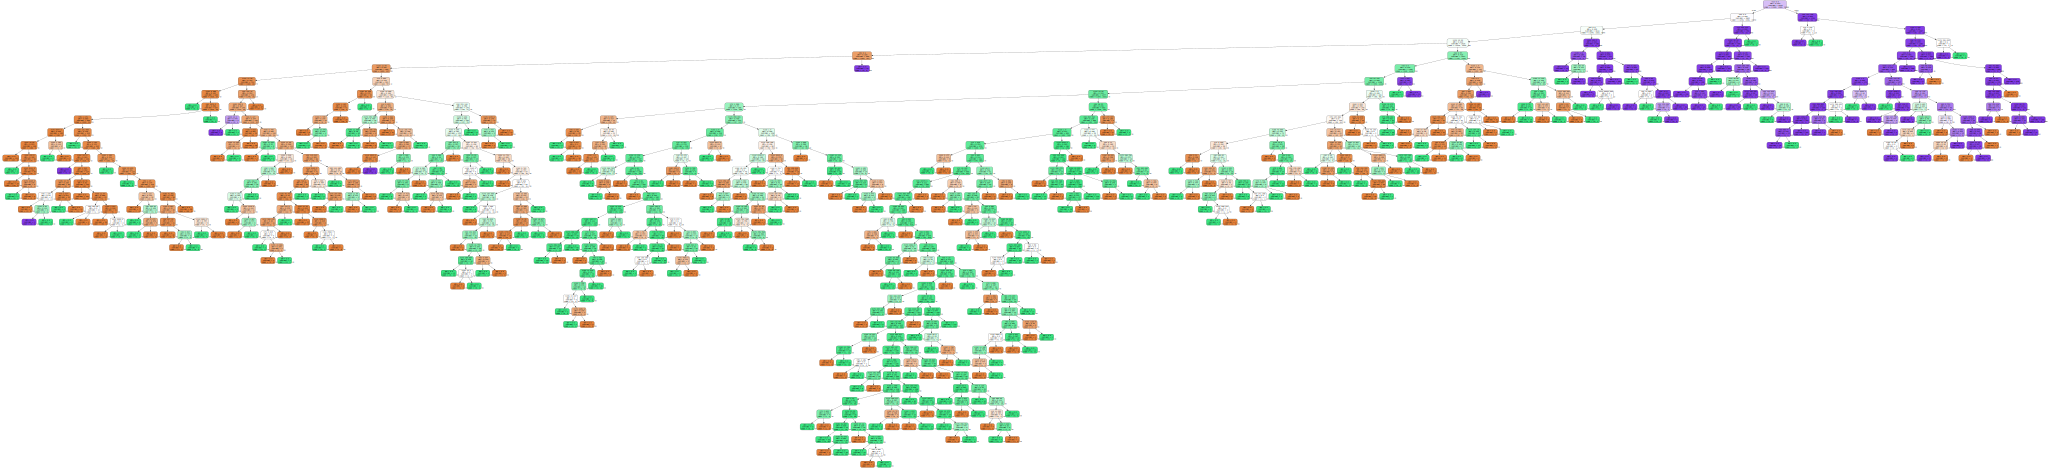

In [272]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
#     feature_names=iris.feature_names,  
#     class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('exoplanet_decision_tree.png')

graph = graphviz.Source(dot_data)  
graph 

In [229]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Accuracy = 0.8667048054919908
Training Data Score: 0.7516688918558078
Testing Data Score: 0.7528604118993135


# Train the Random Forest Model

In [230]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=200)
random_forest_model = random_forest_model.fit(X_train, y_train)
acc = random_forest_model.score(X_test, y_test)
random_forest_model

RandomForestClassifier(n_estimators=200)

In [231]:
# Random Forests in sklearn will automatically calculate feature importance
importances = random_forest_model.feature_importances_
importances

array([0.12384023, 0.09268263, 0.13065667, 0.04855874, 0.04039292,
       0.02816028, 0.03674495, 0.03205047, 0.05476532, 0.0823845 ,
       0.03459642, 0.03217841, 0.12540129, 0.00851315, 0.02228932,
       0.02097758, 0.02049731, 0.02367192, 0.01993167, 0.02170624])

In [232]:
# We can sort the features by their importance
sorted(zip(clf.feature_importances_, selected_features), reverse=True)

[(0.18990513877569992, 'koi_fpflag_co'),
 (0.18356833557281046, 'koi_fpflag_nt'),
 (0.17472123484786115, 'koi_fpflag_ss'),
 (0.14494387971327632, 'koi_model_snr'),
 (0.03294616270448359, 'koi_impact'),
 (0.02948401692080226, 'koi_fpflag_ec'),
 (0.028924413591514278, 'ra'),
 (0.024242659872531033, 'koi_duration'),
 (0.023652873923357225, 'koi_period'),
 (0.022098012635174993, 'koi_prad'),
 (0.020607575908137565, 'koi_kepmag'),
 (0.01907904229294093, 'dec'),
 (0.018268598245273597, 'koi_time0bk'),
 (0.01744272061739126, 'koi_slogg'),
 (0.016331726477728015, 'koi_srad'),
 (0.013435935096674725, 'koi_steff'),
 (0.012707857717543162, 'koi_depth'),
 (0.012358929588882323, 'koi_tce_plnt_num'),
 (0.010115098997174058, 'koi_teq'),
 (0.005165786500743054, 'koi_insol')]

In [233]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {random_forest_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {random_forest_model.score(X_test_scaled, y_test)}")

Accuracy = 0.9096109839816934
Training Data Score: 0.737745565515926
Testing Data Score: 0.7408466819221968


RANDOM FOREST MODEL with GridSearchCV

In [234]:
param_grid_2 = {"n_estimators": [50, 100, 150, 200, 250],
             "max_depth":[100, 200, 300] }

In [235]:
random_forest_grid_model = GridSearchCV(random_forest_model, param_grid_2)

In [236]:
random_forest_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [237]:
print(random_forest_grid_model.best_score_)
print(random_forest_grid_model.best_params_)

0.8960500367489213
{'max_depth': 200, 'n_estimators': 250}


In [238]:
acc = random_forest_grid_model.score(X_test, y_test)

In [239]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {random_forest_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {random_forest_grid_model.score(X_test_scaled, y_test)}")

Accuracy = 0.5051487414187643
Training Data Score: 1.0
Testing Data Score: 0.9073226544622426


# KNN Model

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
knn = KNeighborsClassifier(n_neighbors=5)

In [242]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [243]:
acc = knn.score(X_test, y_test)

In [244]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Accuracy = 0.5011441647597255
Training Data Score: 0.8571428571428571
Testing Data Score: 0.7889016018306636


# KNN Model with GridSearchCV

In [245]:
param_grid_3 = {"n_neighbors": [5, 10, 20] }

In [246]:
knn_grid_model= GridSearchCV(knn, param_grid_3)

In [247]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20]})

In [248]:
print(knn_grid_model.best_score_)
print(knn_grid_model.best_params_)

0.7875270159148299
{'n_neighbors': 5}


In [249]:
acc = knn_grid_model.score(X_test, y_test)

In [250]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {knn_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn_grid_model.score(X_test_scaled, y_test)}")

Accuracy = 0.5011441647597255
Training Data Score: 0.8571428571428571
Testing Data Score: 0.7889016018306636


k: 1, Train/Test Score: 1.000/0.787
k: 3, Train/Test Score: 0.885/0.796
k: 5, Train/Test Score: 0.857/0.789
k: 7, Train/Test Score: 0.850/0.799
k: 9, Train/Test Score: 0.842/0.798
k: 11, Train/Test Score: 0.832/0.799
k: 13, Train/Test Score: 0.831/0.794
k: 15, Train/Test Score: 0.827/0.797
k: 17, Train/Test Score: 0.825/0.800
k: 19, Train/Test Score: 0.824/0.790


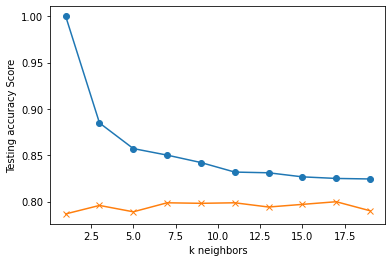

In [251]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn_grid_model = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=k)) #StandardScaler
    knn_grid_model.fit(X_train, y_train)
    train_score = knn_grid_model.score(X_train, y_train)
    test_score = knn_grid_model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [252]:
from sklearn.metrics import classification_report

# SVM Model Classification Report

In [253]:
svm_predictions = svm_model.predict(X_test_scaled)

In [254]:
print(classification_report(y_test, svm_predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.67      0.49      0.56       422
     CONFIRMED       0.61      0.75      0.67       450
FALSE POSITIVE       0.99      1.00      0.99       876

      accuracy                           0.81      1748
     macro avg       0.75      0.75      0.74      1748
  weighted avg       0.81      0.81      0.81      1748



In [255]:
print(classification_report(svm_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.87      0.45      0.60       818
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       0.96      0.90      0.93       930

      accuracy                           0.69      1748
     macro avg       0.61      0.45      0.51      1748
  weighted avg       0.92      0.69      0.77      1748



# SVM Model with GridSearchCV Classification Report

In [256]:
svm_grid_predictions = svm_grid_model.predict(X_test_scaled)

In [257]:
print(classification_report(y_test, svm_grid_predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.67      0.58      0.62       422
     CONFIRMED       0.65      0.71      0.68       450
FALSE POSITIVE       0.99      1.00      0.99       876

      accuracy                           0.82      1748
     macro avg       0.77      0.76      0.76      1748
  weighted avg       0.82      0.82      0.82      1748



In [258]:
print(classification_report(svm_grid_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.26      0.25      0.26       444
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       0.70      0.47      0.56      1304

      accuracy                           0.41      1748
     macro avg       0.32      0.24      0.27      1748
  weighted avg       0.59      0.41      0.48      1748



# Decision Tree Classification Report

In [259]:
print(classification_report(clf.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.74      0.75      0.74       417
     CONFIRMED       0.77      0.75      0.76       462
FALSE POSITIVE       0.98      0.99      0.98       869

      accuracy                           0.87      1748
     macro avg       0.83      0.83      0.83      1748
  weighted avg       0.87      0.87      0.87      1748



# Random Forest Model Classification Report

In [260]:
random_forest_predictions = random_forest_model.predict(X_test_scaled)

In [261]:
print(classification_report(random_forest_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       1.00      0.49      0.65       861
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       1.00      0.99      0.99       887

      accuracy                           0.74      1748
     macro avg       0.66      0.49      0.55      1748
  weighted avg       1.00      0.74      0.83      1748



In [262]:
print(classification_report(random_forest_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.79      0.85      0.82       393
     CONFIRMED       0.85      0.82      0.83       466
FALSE POSITIVE       1.00      0.98      0.99       889

      accuracy                           0.91      1748
     macro avg       0.88      0.88      0.88      1748
  weighted avg       0.91      0.91      0.91      1748



# Random Forest Model with GridSearchCV Classification Report

In [263]:
random_forest_grid_predictions = random_forest_grid_model.predict(X_test_scaled)

In [264]:
print(classification_report(random_forest_grid_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.79      0.84      0.81       395
     CONFIRMED       0.84      0.82      0.83       462
FALSE POSITIVE       1.00      0.98      0.99       891

      accuracy                           0.91      1748
     macro avg       0.88      0.88      0.88      1748
  weighted avg       0.91      0.91      0.91      1748



In [265]:
print(classification_report(random_forest_grid_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.02      0.30      0.03        23
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       1.00      0.51      0.67      1725

      accuracy                           0.51      1748
     macro avg       0.34      0.27      0.24      1748
  weighted avg       0.99      0.51      0.67      1748



# KNN Model Classification Report

In [266]:
knn_predictions = knn.predict(X_test_scaled)

In [267]:
print(classification_report(knn_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.49      0.59      0.54       353
     CONFIRMED       0.66      0.58      0.62       508
FALSE POSITIVE       1.00      0.99      0.99       887

      accuracy                           0.79      1748
     macro avg       0.72      0.72      0.72      1748
  weighted avg       0.80      0.79      0.79      1748



In [268]:
print(classification_report(knn.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.00      0.00      0.00         0
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       1.00      0.50      0.67      1748

      accuracy                           0.50      1748
     macro avg       0.33      0.17      0.22      1748
  weighted avg       1.00      0.50      0.67      1748



# KNN Model with GridSearchCV Classification Report

In [269]:
knn_grid_predictions = knn_grid_model.predict(X_test_scaled)

In [270]:
print(classification_report(knn_grid_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       1.00      0.47      0.64       886
     CONFIRMED       0.00      0.00      0.00       140
FALSE POSITIVE       0.81      0.98      0.89       722

      accuracy                           0.65      1748
     macro avg       0.60      0.49      0.51      1748
  weighted avg       0.84      0.65      0.69      1748



In [271]:
print(classification_report(knn_grid_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.44      0.61      0.51       305
     CONFIRMED       0.71      0.58      0.64       556
FALSE POSITIVE       1.00      0.99      0.99       887

      accuracy                           0.79      1748
     macro avg       0.72      0.72      0.71      1748
  weighted avg       0.81      0.79      0.80      1748



# Save the Model

In [160]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'zen_svm_grid_model.sav'
# joblib.dump(svm_grid_model, filename)